# Data analysis
In this iPython notebook, we analyse the data produced by the basic stock market model

In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import ast
import json
import re
style.use('seaborn-darkgrid')

First, I open a connection to the database

In [2]:
%cd C:/Users/joerischasfoort/Documents/GitHub/abm/

C:\Users\joerischasfoort\Documents\GitHub\abm


In [3]:
conn = sqlite3.connect('dataBaseOffline.sqlite')
cur = conn.cursor()

## 1 State variables 
Using the Statevariables, Variabletypes and Objects tables, I then analyse the state variables of the simulated objects: stocks, firms, and traders. 
### 1.1 Stocks 
The state variables of stocks are: 
* the firm the stock links to,
* the face value,
* the amount of stocks outstanding. 

In this version of the model these variables are static. 

In [4]:
stockVariables = pd.read_sql_query(
    """
    SELECT Statevariables0.seed ,Statevariables0.period, Variabletypes0.variable_type, Objects0.object_name, Objects0.object_type ,Statevariables0.value 
    FROM Statevariables0 JOIN Variabletypes0 JOIN Objects0 ON Statevariables0.variable_id = Variabletypes0.id and Statevariables0.owner_id = Objects0.id 
    WHERE Objects0.object_type = 'stock'
    """, conn)

In [6]:
time = stockVariables.query('variable_type == "amount" and object_name == "stock_0" and seed == 0')['period']
stocks = []
for stock in stockVariables['object_name'].unique():
    stocks.append(stockVariables.query('variable_type == "amount" and object_name == "{}" and seed == 0'.format(stock))['value'])

In [20]:
stock_0 = stockVariables.query('variable_type == "amount" and object_name == "stock_0" and seed == 0')['value']
stock_1 = stockVariables.query('variable_type == "amount" and object_name == "stock_1"')['value']
stock_2 = stockVariables.query('variable_type == "amount" and object_name == "stock_2"')['value']
stock_3 = stockVariables.query('variable_type == "amount" and object_name == "stock_3"')['value']


In [10]:
face_value_0 = stockVariables.query('variable_type == "face_value" and object_name == "stock_0"')['value']
face_value_1 = stockVariables.query('variable_type == "face_value" and object_name == "stock_1"')['value']
face_value_2 = stockVariables.query('variable_type == "face_value" and object_name == "stock_2"')['value']
face_value_3 = stockVariables.query('variable_type == "face_value" and object_name == "stock_3"')['value']

In [11]:
stockVariables.query('variable_type == "amount" and object_name == "stock_2" and seed == 0')

,seed,period,variable_type,object_name,object_type,value
43212,0.0,0.0,amount,stock_2,stock,400
43213,0.0,0.0,amount,stock_2,stock,400
43214,0.0,0.0,amount,stock_2,stock,400
43215,0.0,0.0,amount,stock_2,stock,400
43216,0.0,0.0,amount,stock_2,stock,400
43217,0.0,0.0,amount,stock_2,stock,400
43218,0.0,0.0,amount,stock_2,stock,400
43219,0.0,0.0,amount,stock_2,stock,400
43220,0.0,0.0,amount,stock_2,stock,400
43221,0.0,0.0,amount,stock_2,stock,400


AttributeError: 'Series' object has no attribute 'find'

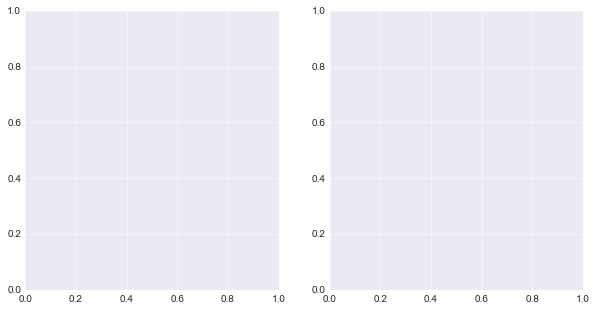

In [24]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, stock_0, label='stock_0')
ax1.plot(time, stock_1, label='stock_1')
ax1.plot(time, stock_2, label='stock_2')
ax1.plot(time, stock_3, label='stock_3')

ax2.plot(time, face_value_0, label='stock_0')
ax2.plot(time, face_value_1, label='stock_1')
ax2.plot(time, face_value_2, label='stock_2')
ax2.plot(time, face_value_3, label='stock_3')

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax2.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('amount_of stocks outstanding', fontsize='14')
ax2.set_ylabel('stock facevalue', fontsize='14')

plt.legend(loc=2, fontsize='14')

### 1.2 Firms 
The state variables of firms are: 
* profit
* bookvalue (*fixed*), 
* dividend rate (*fixed*).

In [488]:
firmVariables = pd.read_sql_query(
    """
    SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type, Statevariables.value 
    FROM Statevariables JOIN Variabletypes JOIN Objects 
    ON Statevariables.variable_id = Variabletypes.id and Statevariables.owner_id = Objects.id 
    WHERE Objects.object_type = 'firm'
    """, conn)

In [489]:
#firmVariables.head()

In [490]:
firm_0 = firmVariables.query('variable_type == "profit" and object_name == "firm_0"')['value']
firm_1 = firmVariables.query('variable_type == "profit" and object_name == "firm_1"')['value']
firm_2 = firmVariables.query('variable_type == "profit" and object_name == "firm_2"')['value']
firm_3 = firmVariables.query('variable_type == "profit" and object_name == "firm_3"')['value']
f_time = firmVariables.query('variable_type == "profit" and object_name == "firm_0"')['period']

#### 1.2.1 Firm profits

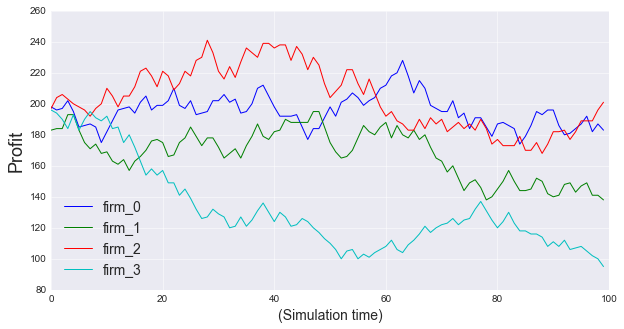

In [491]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

ax1.plot(f_time, firm_0, label='firm_0')
ax1.plot(f_time, firm_1, label='firm_1')
ax1.plot(f_time, firm_2, label='firm_2')
ax1.plot(f_time, firm_3, label='firm_3')

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Profit', fontsize='18')

plt.legend(loc='best', fontsize='14')

### 1.3 Traders

In this section, we examine the state variables of traders. These are: 
* Money
* Portfolio of stocks: *The type and amount of that stock agent holds*
* Bid-ask spread (**fixed**): *the percentage difference between the amount at which an agent is willing to buy and sell a stock.*
* Memory size (**fixed**): *the amount of periods an agent remembers stock prices*

In [492]:
traderVariables = pd.read_sql_query(
    """
    SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type, Statevariables.value 
    FROM Statevariables JOIN Variabletypes JOIN Objects 
    ON Statevariables.variable_id = Variabletypes.id and Statevariables.owner_id = Objects.id 
    WHERE Objects.object_type = 'trader'
    """, conn)

In [493]:
#traderVariables.head()

In [494]:
t_time = traderVariables.query('variable_type == "money" and object_name == "trader_0"')['period']

#### 1.3.1 Money:
Over time some traders trade more than other and thus their **money** either increases or decreases. All traders start out with money between 200 and 250 and over time this branches out to a distribution between 0 and 280. 

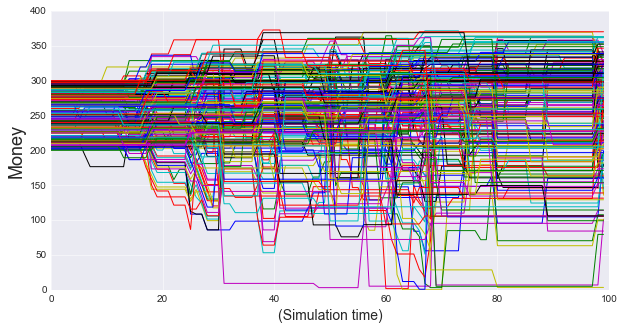

In [495]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

for trader in traderVariables['object_name'].unique():
    ax1.plot(t_time, 
            traderVariables.query('variable_type == "money" and object_name == "{}"'.format(trader))['value'],
            label=trader)

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Money', fontsize='18')

#plt.legend(loc=2, fontsize='14')

#### 1.3.2 Stock portfolio:
Likewise the distribution of stocks changes as traders trade with each other. 

In [496]:
def transformStringToDict(stringDict):
    """This function inserts double quotation marks into the current dictionary string"""
    original = stringDict
    indis = [m.start() for m in re.finditer('stock_', original)]
    s = original
    counter = 0
    for ix in indis:
        ix = ix + counter
        s = s[:ix] + '"' + s[ix:]
        counter += 1
    dubbelPunten = [m.start() for m in re.finditer(':', original)]
    counter2 = 0
    for ix2 in dubbelPunten:
        ix2 = ix2 + counter2
        s = s[:(ix2+1)] + '"' + s[(ix2+1):]
        counter2 += 2
    d = json.loads(s)
    return d

In [497]:
traderPortfolios = traderVariables.query('variable_type == "stocks"')
traderPortfolios['value'] = traderPortfolios['value'].apply(transformStringToDict)

C:\Users\p267237\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


From the value column we create seperate columns for each stock in the trader portfolio.

In [498]:
stocks = {}
for stock in stockVariables['object_name'].unique():
    stocks[stock] = []
    for i in range(len(traderPortfolios)):
        stocks[stock].append(traderPortfolios['value'].iloc[i][stock])
    traderPortfolios[stock] = stocks[stock]
#traderPortfolios.head()

C:\Users\p267237\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [499]:
tp_time = traderPortfolios.query('object_name == "trader_0"')['period']

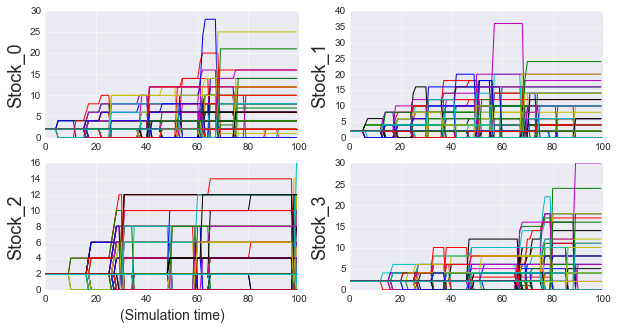

In [500]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for trader in traderPortfolios['object_name'].unique():
    ax1.plot(tp_time, 
            traderPortfolios.query('object_name == "{}"'.format(trader))['stock_0'],
            label=trader)
    
for trader in traderPortfolios['object_name'].unique():
    ax2.plot(tp_time, 
            traderPortfolios.query('object_name == "{}"'.format(trader))['stock_1'],
            label=trader)
    
for trader in traderPortfolios['object_name'].unique():
    ax3.plot(tp_time, 
            traderPortfolios.query('object_name == "{}"'.format(trader))['stock_2'],
            label=trader)
    
for trader in traderPortfolios['object_name'].unique():
    ax4.plot(tp_time, 
            traderPortfolios.query('object_name == "{}"'.format(trader))['stock_3'],
            label=trader)

ax1.set_ylabel('Stock_0', fontsize='18')
ax2.set_ylabel('Stock_1', fontsize='18')
ax3.set_xlabel('(Simulation time)', fontsize='14')
ax3.set_ylabel('Stock_2', fontsize='18')

ax3.set_xlabel('(Simulation time)', fontsize='14')
ax4.set_ylabel('Stock_3', fontsize='18')

#plt.legend(loc=2, fontsize='14')

## 2 Transactions
Using the Transactions and Objects tables, I then analyse the transactions made by traders. 

In [501]:
transactions = pd.read_sql_query("""
SELECT Transactions.id, Transactions.period, Transactors.role, Objects.object_name, Objects.object_type, Transactions.amount_of_product, Transactions.amount_of_money 
FROM Transactors JOIN Transactions JOIN Objects 
ON Transactors.transaction_id = Transactions.id and Transactors.transactor_id = Objects.id
""", conn)

The price of transactions is not recorded in the simulation. Therefore, I derive it by dividing the amount of money payed for a single transactions by the amount of stocks traded. 

In [502]:
transactions['price'] = transactions['amount_of_money'] / transactions['amount_of_product']

In [503]:
transactions.head()

,id,period,role,object_name,object_type,amount_of_product,amount_of_money,price
0,1,5,buyer,trader_3,trader,2,18.9625,9.48125
1,1,5,seller,trader_37,trader,2,18.9625,9.48125
2,1,5,stock,stock_0,stock,2,18.9625,9.48125
3,2,5,buyer,trader_20,trader,2,18.9625,9.48125
4,2,5,seller,trader_22,trader,2,18.9625,9.48125


### 2.1 Prices 
A stock can be traded at different prices at the same time by different traders. I therefore construct a seperate table which summarizes stocks prices over time. 

In [504]:
transactionTime = [n for n in range(100)]

In [505]:
stockPrices = {'period': transactionTime}
for stock in transactions.query('object_type == "stock"')['object_name'].unique():
    allPrices = []
    for period in transactionTime:
        pricesAtPeriod = []
        for price in transactions.query('object_name == "{}" and period == {}'.format(stock,period))['price']:
            pricesAtPeriod.append(price)
        if (not not pricesAtPeriod):
            allPrices.append(pricesAtPeriod)
        else:
            allPrices.append(np.nan)
    stockPrices[stock] = allPrices

In [506]:
pricesOvertime = pd.DataFrame(stockPrices)
pricesOvertime.head()

,period,stock_0,stock_1,stock_2,stock_3
0,0,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN


### 2.1.1 Average prices

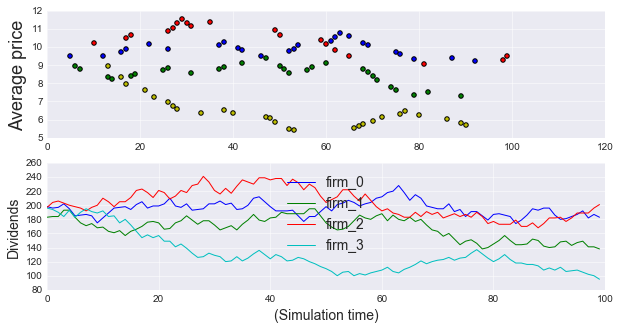

In [507]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(pricesOvertime.index, pricesOvertime['stock_0'].apply(np.mean), c='b')
ax1.scatter(pricesOvertime.index, pricesOvertime['stock_1'].apply(np.mean), c='g')
ax1.scatter(pricesOvertime.index, pricesOvertime['stock_2'].apply(np.mean), c='r')
ax1.scatter(pricesOvertime.index, pricesOvertime['stock_3'].apply(np.mean), c='y')

ax2.plot(f_time, firm_0, label='firm_0')
ax2.plot(f_time, firm_1, label='firm_1')
ax2.plot(f_time, firm_2, label='firm_2')
ax2.plot(f_time, firm_3, label='firm_3')

ax2.set_ylabel('Dividends', fontsize='14')
ax2.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Average price', fontsize='18')

plt.legend(loc='best', fontsize='14')
fig.savefig('pricesAndDividends.png')

### 2.2 Volume

In [508]:
transactions.head()

,id,period,role,object_name,object_type,amount_of_product,amount_of_money,price
0,1,5,buyer,trader_3,trader,2,18.9625,9.48125
1,1,5,seller,trader_37,trader,2,18.9625,9.48125
2,1,5,stock,stock_0,stock,2,18.9625,9.48125
3,2,5,buyer,trader_20,trader,2,18.9625,9.48125
4,2,5,seller,trader_22,trader,2,18.9625,9.48125


In [509]:
def dfOfVolumesPerStock(transactionsDataFrame, listOfStocks, SIMULATIONTIME):
    groupedTransactions = transactionsDataFrame.groupby(['period', 'object_name'])
    tradeVolumePerStock = {}
    for stock in listOfStocks:
        tradeVolume = []
        for time in [n for n in range(SIMULATIONTIME)]:
            try:
                volume = groupedTransactions.get_group((time, stock))['amount_of_product'].sum()
            except:
                volume = 0
            tradeVolume.append(volume)
        tradeVolumePerStock[stock] = tradeVolume
    return pd.DataFrame(tradeVolumePerStock)

In [510]:
STOCKS = ['stock_0', 'stock_1', 'stock_2', 'stock_3']
volumesPerStock = dfOfVolumesPerStock(transactions, STOCKS, 100)

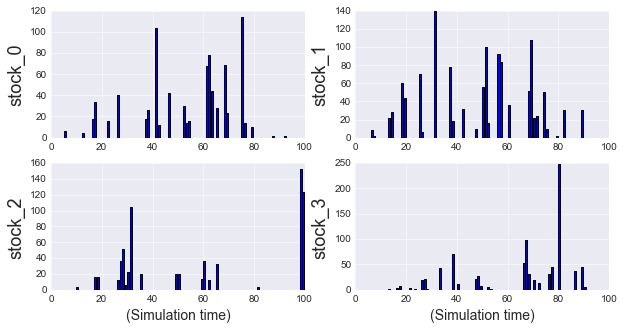

In [511]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,5))

for stock, ax in list(zip(STOCKS, [ax1,ax2,ax3,ax4])):
    ax.bar(volumesPerStock.index, volumesPerStock[stock])
    ax.set_ylabel(stock, fontsize='18')

ax3.set_xlabel('(Simulation time)', fontsize='14')
ax4.set_xlabel('(Simulation time)', fontsize='14')

fig.savefig('tradeVolumes.png')

## Volumes and prices 

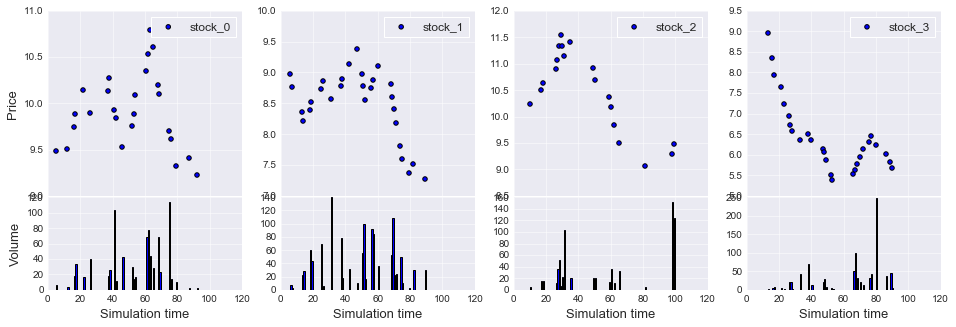

In [512]:
# Three subplots sharing both x/y axes
#fig, ((ax1, ax2)) = plt.subplots(2, figsize=(6, 6), sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16,5), sharex=True, gridspec_kw={'height_ratios':[2,1]})
priceAxes = (ax1, ax2, ax3, ax4) 
volumeAxes = (ax5, ax6, ax7, ax8)

# priceAxes[0].scatter(pricesOvertime.index, pricesOvertime['stock_0'].apply(np.mean), c='b', label='stock_0')
# volumeAxes[0].bar(volumesPerStock.index, volumesPerStock['stock_0'])


for pAx, vAx, stock in list(zip(priceAxes, volumeAxes, STOCKS)):
    pAx.scatter(pricesOvertime.index, pricesOvertime[stock].apply(np.mean), label=stock)
    vAx.bar(volumesPerStock.index, volumesPerStock[stock])

for vAx in volumeAxes:
    vAx.set_xlabel('Simulation time', fontsize='13')    

ax1.set_ylabel('Price', fontsize='13')
ax5.set_ylabel('Volume', fontsize='13')
    
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.01)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
for pAx in priceAxes:
    pAx.legend(frameon=True, loc='best')

fig.savefig('volumesAndPrices.png')

## Standard stock market info dataframes:
rows: quarter. 

columns: [open, high, low, close, volume]

In [513]:
#cur.close()
#conn.close()